<a href="https://colab.research.google.com/github/Ernietsai/Python_Elective_Courses_114/blob/main/Colab%E5%AF%A6%E4%BD%9C1%EF%BC%9A%E5%BB%BA%E7%AB%8B%E4%BD%A0%E7%9A%84%E7%AC%AC%E4%B8%80%E5%80%8B%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF%E6%A8%A1%E5%9E%8B_stu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://commons.wikimedia.org/wiki/File:MnistExamples.png#/media/File:MnistExamples.png"
  />
  <center>維基百科</center>
  <center>圖片來源:https://zh.wikipedia.org/</center>
</p>

## 1: 切換 TensorFlow 至 2.x 版



In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__ # 確認 TensorFlow 版本

'2.19.0'

## 2: 載入套件及資料集

In [ ]:
%matplotlib inline
# Import useful packages
import matplotlib.pyplot as plt
import numpy as np

# Import functions for data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

## 3: 資料前處理 (Data Preprocessing)

### 讀取 MNIST 資料集

我們在此透過 `datasets` 讀取 MNIST 手寫數字圖片資料集

此外，`datasets` 提供了以下數據資料集，並可使用在各種模型的練習上
* CIFAR-10: 10 個類別的小影像分類資料集
* CIFAR-100: 100 個類別的小影像分類資料集
* IMDB: 電影評論情感分類數據集
* Reuters newswire topics: 路透社新聞標題分類
* MNIST: 手寫數字資料集
* Fashion MNIST: 時尚物品資料集
* Boston housing: 波士頓房價資料集

關於各資料集的格式與出處，可參考: https://keras.io/datasets/


In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train.shape # 6 萬筆 28x28 的資料

(60000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape # 6 萬個整數，代表對應資料的號碼

(60000,)

In [ ]:
set(y_train)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

In [ ]:
set(map(int, y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### 資料標準化 (Normalizing data)
* a) 確認資料的數值範圍
* b) 標準化至指定範圍



[重點] 標準化的資料能協助神經網路的訓練速度及穩定度

#### 觀察單筆資料

In [ ]:
# Random pick one data from training set
idx = 0
target = 8
while idx < X_train.shape[0] and y_train[idx] == np.uint(target):
  idx += 1
while y_train[idx] != np.uint(target):
  idx = np.random.randint(X_train.shape[0])
sample_x = X_train[idx]
sample_y = y_train[idx]

In [ ]:
sample_y

np.uint8(8)

In [ ]:
print("最小值:", sample_x.min())
print("最大值:", sample_x.max())

最小值: 0
最大值: 255


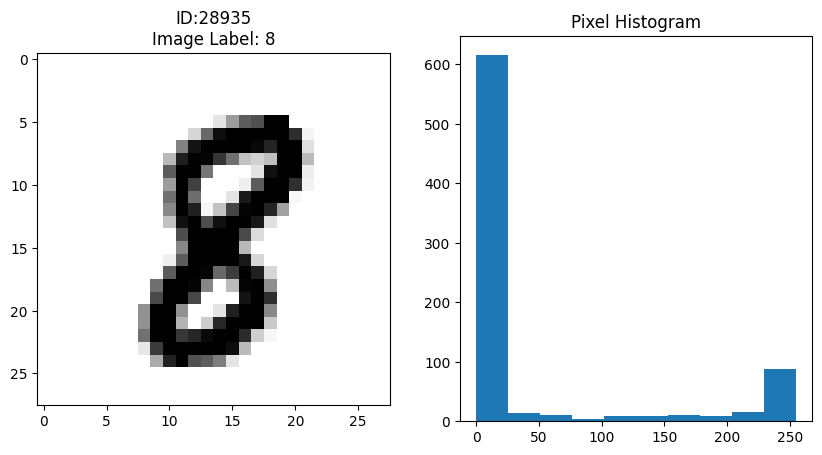

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_x, 'gray_r')
plt.title("ID:%d\nImage Label: %d" %(idx, sample_y))

plt.subplot(1, 2, 2)
plt.hist(sample_x.flatten())
plt.title("Pixel Histogram");

#### 檢查所有資料的值之範圍

In [ ]:
print("最小值:", X_train.min())
print("最大值:", X_train.max())

最小值: 0
最大值: 255


(array([ 5999.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 54001.]),
 array([254. , 254.1, 254.2, 254.3, 254.4, 254.5, 254.6, 254.7, 254.8,
        254.9, 255. ]),
 <BarContainer object of 10 artists>)

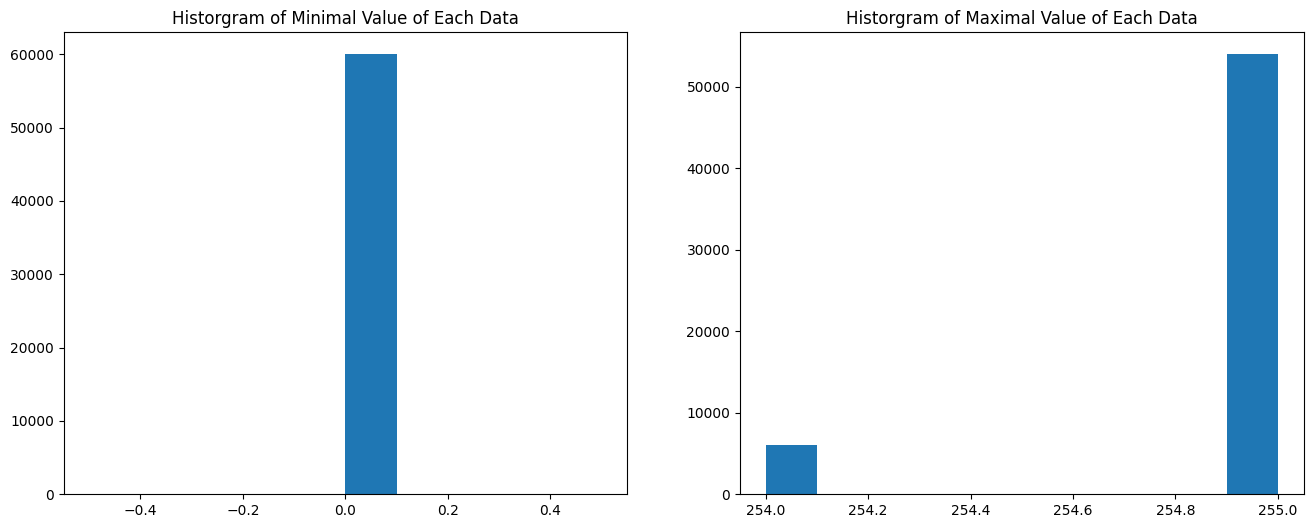

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('Historgram of Minimal Value of Each Data')
plt.hist(X_train.min(axis=(1, 2)))

plt.subplot(1, 2, 2)
plt.title('Historgram of Maximal Value of Each Data')
plt.hist(X_train.max(axis=(1, 2)))

#### 標準化 (Normalization)

在數學中，將資料「單位化」的方式有很多，最常見的是限制資料數值的範圍（即最大值與最小值），假設資料的數值範圍為 $[a, b]$，透過

$$
f(x) = \frac{x-a}{b-a}
$$

可將資料的數值範圍變換到 $[0, 1]$.

在這裡，由於 MNIST 的數值範圍的最小值為 0，所以在這邊只需除以最大值 255，就可將資料的數值範圍限制在 $[0, 1]$.


In [ ]:
X_train = X_train / X_train.max()
print("最小值:", X_train.min())
print("最大值:", X_train.max())

最小值: 0.0
最大值: 1.0


In [ ]:
X_test = X_test / X_test.max()
print("最小值:", X_test.min())
print("最大值:", X_test.max())

最小值: 0.0
最大值: 1.0


### 調整資料格式
我們通常會透過 `.reshpe` 的方式，將資料「尺寸」轉換成符合神經網路輸入的格式

我們將每筆格式為 $28\times28$ 的資料，拉直 (flatten) 成一個長度為 $28*28=784$ 的一維陣列。

換言之，訓練資料的大小將從 $(60000, 28, 28)$ 轉換成 $(60000, 784)$。

測試資料則由 $(10000, 28, 28)$ 轉換成 $(10000, 784)$


In [ ]:
X_train = X_train.reshape(-1, 28*28)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test = X_test.reshape(-1, 28*28)

In [ ]:
X_test.shape

(10000, 784)

### 調整類別的格式
在分類問題上，我們會將不具有「順序」的類別，轉換成適當的格式，其中一種常見的方式稱作單熱編碼 (one-hot encoding)；我們先看下面的例子：

假設我們有三個類別: 蘋果、香蕉、貓

透過單熱編碼，我們會將每個類別其轉換成長度為類別總數的向量，其結果如下：

| 蘋果 | 香蕉 | 貓 |
|-------|--------|-----|
|  \begin{bmatrix}1\\0\\0\end{bmatrix}  | \begin{bmatrix}0\\1\\0\end{bmatrix} | \begin{bmatrix}0\\0\\1\end{bmatrix}|

換言之，若一個物件的預測結果是以下的向量

\begin{bmatrix}0.14\\0.21\\0.65\end{bmatrix}

我們則說該物件有 $14\%$ 的機率是**蘋果**，$21\%$ 的機率是**香蕉**，$65\%$ 的機率是**貓**。

因為屬於**貓**類別的機率最大，因此預測類別為「貓」。

在 MNIST 資料集中，我們則將類別做以下轉換：

| 0 | 1 | $\cdots$ | 8 | 9 |
|-|-|-|-|-|
|  \begin{bmatrix}1\\0\\0\\0\\0\\0\\0\\0\\0\\0\end{bmatrix}  | \begin{bmatrix}0\\1\\0\\0\\0\\0\\0\\0\\0\\0\end{bmatrix} | $\cdots$ | \begin{bmatrix}0\\0\\0\\0\\0\\0\\0\\0\\1\\0\end{bmatrix} | \begin{bmatrix}0\\0\\0\\0\\0\\0\\0\\0\\0\\1\end{bmatrix} |

我們可以用 Numpy 簡單的實作單熱編碼，也可以透過 Keras 提供的 `to_categorical` 來進行。

首先，先簡易的操作幾個例子。

In [ ]:
toy_label_1 = np.array([0, 1, 2, 1, 0]) # 3 類別資料

In [ ]:
to_categorical(toy_label_1)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
toy_label_2 = toy_label_1 + 1 # 4 類別資料，但缺少第 0 類資料 (y = 0)
toy_label_2

array([1, 2, 3, 2, 1])

In [ ]:
to_categorical(toy_label_2)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [ ]:
toy_label_3 = toy_label_1 + 1 # 4 類別資料，但缺少第 0 類資料 (y = 0)
toy_label_3

array([1, 2, 3, 2, 1])

In [ ]:
to_categorical(toy_label_3, 4)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

接著，我們來處理資料集的標籤資料，並觀察單筆資料在轉換前後的差別。

In [ ]:
print(y_train[idx])

8


In [ ]:
y_train = to_categorical(y_train, 10)

In [ ]:
y_train[idx]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
y_test = to_categorical(y_test, 10)

## 4: 建立你的第一個全連接神經網路 (Fully-Connected Neural Network)

在這個部分，我們將逐步帶領大家建立，一個有一層隱藏層的全連接神經網路


In [ ]:
# Import necessary modules to build our first neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

### 定義模型

透過 `Sequential` 函式建立一個空的「模型」

In [ ]:
model = Sequential()

### 將隱藏層加入模型中

隱藏層的參數:
- 神經元個數: 128
- 激活函數: sigmoid
- 神經網路的輸入格式: (784,)


[重要] 只有第一層隱藏層必須指定的輸入格式

In [ ]:
model.add(Dense(units=128, activation='sigmoid', input_shape=(784,)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=10, activation='sigmoid'))

### 將輸出層加入模型中

- 神經元個數: 10
- 激活函數: softmax

[重要]

1. 若是二分類模型，則輸出層的神經元個數為 1，激活函數使用 **sigmoid**。

2. 若是多分類模型，則輸出層的神經元個數=類別總數，激活函數則唯一指定 **softmax**。

In [ ]:
model.add(Dense(units=10, activation='softmax'))

### 編譯模型: 設定模型訓練時的設定
- Optimizer:
    Stochastic Gradient Descent (SGD)
- Loss:
    Categorical Cross-entropy


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,624 (436.03 KB)

 Trainable params: 111,624 (436.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### 訓練模型: 透過訓練模型來學習分類資料的函數

In [ ]:
training_history = model.fit(X_train, y_train,
                             batch_size=32,
                             epochs=50,
                             validation_data=(X_test, y_test)
                             )

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.8572 - loss: 0.5461 - val_categorical_accuracy: 0.8737 - val_loss: 0.4760
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8743 - loss: 0.4808 - val_categorical_accuracy: 0.8861 - val_loss: 0.4297
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - categorical_accuracy: 0.8801 - loss: 0.4457 - val_categorical_accuracy: 0.8914 - val_loss: 0.3982
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8881 - loss: 0.4122 - val_categorical_accuracy: 0.8961 - val_loss: 0.3745
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.8949 - loss: 0.3819 - val_categorical_accuracy: 0.9006 - val_loss: 0.3552
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8978 - loss: 0.3650 - val_categorical_accuracy: 0.9038 - val_loss: 0.3402
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accurac

In [ ]:
training_history = model.fit(X_train, y_train,
                             batch_size=32,
                             epochs=50,
                             validation_data=(X_test, y_test)
                             )

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.5381 - loss: 1.8177 - val_categorical_accuracy: 0.8227 - val_loss: 0.8648
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8369 - loss: 0.7784 - val_categorical_accuracy: 0.8754 - val_loss: 0.5613
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.8711 - loss: 0.5467 - val_categorical_accuracy: 0.8884 - val_loss: 0.4558
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8838 - loss: 0.4558 - val_categorical_accuracy: 0.8955 - val_loss: 0.4036
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8906 - loss: 0.4103 - val_categorical_accuracy: 0.8999 - val_loss: 0.3716
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8973 - loss: 0.3804 - val_categorical_accuracy: 0.9039 - val_loss: 0.3504
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy

## 4: 模型評估

一個模型的建立、訓練是否洽當，可在訓練當下及訓練結束後兩個階段進行評估。

1. 訓練中：觀察損失函數的變化，並監測分類準確率來決定是否中止訓練。

2. 訓練後：，觀察模型在測試資料 (testing data) 上的表現，以評估模型設計及訓練過程是否有可以調整的空間。

一般而言，我們可以考慮調整的超參數 (hyper parameter) 有下列這些:
- 隱藏層的數量
- 每個隱藏層的神經元數量
- 優化器 (optimizer)
- 學習速率 (learning rate)
- 損失函數
- 批次數量 (batch size)
- 訓練次數 (epochs)

### 畫出訓練過程

`training_history.history` 是一個字典類別 (dict type) 的物件。

這個字典物件紀錄訓練時的各種指標，包含損失函數 (loss) 的變化及分類準確率 (accuracy)。

此外，若有指定 `validation_data` 或是 `validation_ratio`，則此處也會包含驗證資料在訓練時的各種指標變化。

In [ ]:
training_history.history.keys()

dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])

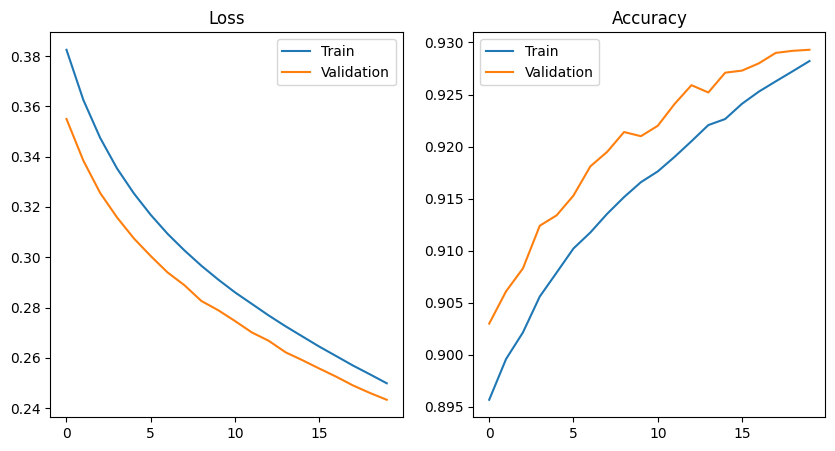

In [ ]:
#一層隱藏層，訓練20回
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

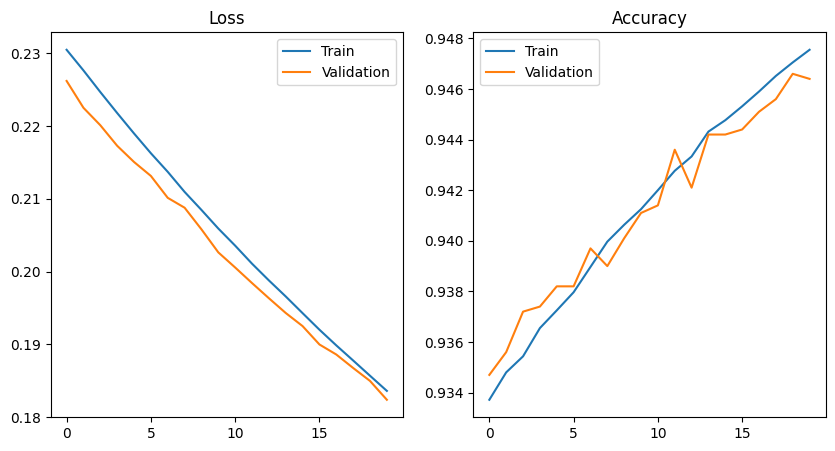

In [ ]:
#一層隱藏層，訓練50回
start = 30
end = 50
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'][start:end])
plt.plot(training_history.history['val_loss'][start:end])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'][start:end])
plt.plot(training_history.history['val_categorical_accuracy'][start:end])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

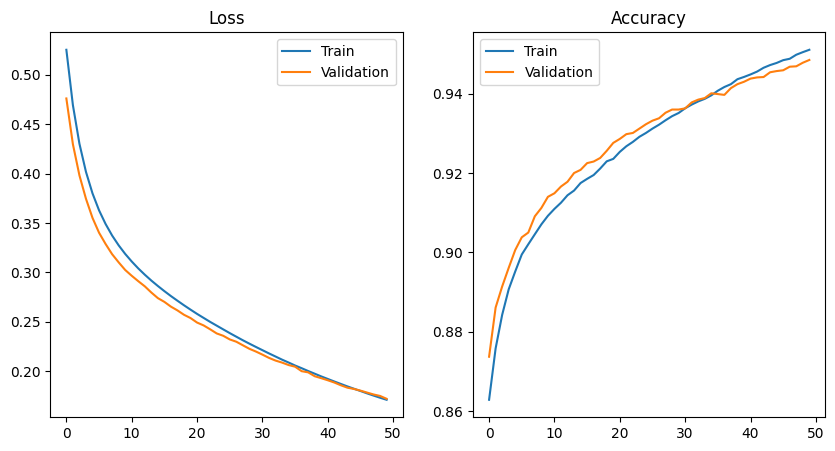

In [ ]:
#兩層隱藏層，訓練50回
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

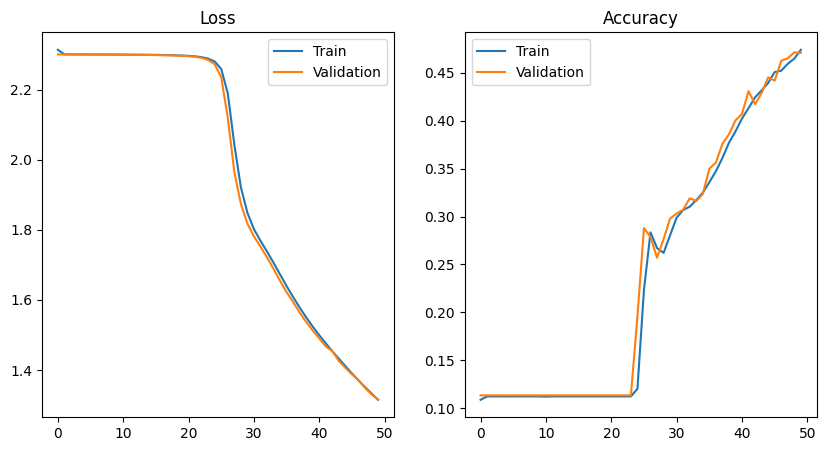

In [ ]:
#四層隱藏層，訓練50回
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.4575 - loss: 1.3527


In [ ]:
print("測試資料 loss: %f" %test_loss)
print("測試資料準確率: %f" %test_accuracy)

測試資料 loss: 1.315638
測試資料準確率: 0.470800


### 苗頭不對就閃人 - 早停法 (Early Stopping)
模型的訓練可以設置監控，監控的目的在於，當所監控的數值沒有隨著訓練穩定上升 (如:準確率) 或下降 (如:損失) 時，可以自動停止訓練，並讓使用者重新設定各種參數以重新訓練。

設置監控的方法很簡單，只需在模型訓練時，在 `.fit` 中的 `callbacks` 加入 `EarlyStoping` 函式即可。

更多關於好用的 Callbacks 函式，請參照: https://keras.io/callbacks/

In [ ]:
training_history = model.fit(X_train, y_train,
                             batch_size=32,
                             epochs=50,
                             validation_data=(X_test, y_test),
                             callbacks=[EarlyStopping(monitor='val_loss', mode='auto', patience=3)]
                             )

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - categorical_accuracy: 0.1043 - loss: 2.3419 - val_categorical_accuracy: 0.1135 - val_loss: 2.3011
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.1117 - loss: 2.3011 - val_categorical_accuracy: 0.1135 - val_loss: 2.3009
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.1122 - loss: 2.3011 - val_categorical_accuracy: 0.1135 - val_loss: 2.3009
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.1125 - loss: 2.3011 - val_categorical_accuracy: 0.1135 - val_loss: 2.3008
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.1107 - loss: 2.3012 - val_categorical_accuracy: 0.1135 - val_loss: 2.3008
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.1143 - loss: 2.3011 - val_categorical_accuracy: 0.1135 - val_loss: 2.3008
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy

## 5: 模型的儲存與載入

模型的存取有兩種方式，一種則不儲存模型架構，**僅**儲存權重，另一種是把模型架構與權重儲存下來。

**僅**儲存權重可以節省模型儲存檔的大小，但在載入時，必須要先建立同樣架構的模型，再載入模型權重。

儲存模型架構與權重的方法，則在讀取儲存檔時，會建立模型並同時載入權重。

我們將示範兩種不同的模型存取方式。

In [ ]:
from tensorflow.keras.models import load_model

### 方法一：僅儲存模型權重

我們可以透過 `.save_weights` 及 `.load_weights` 來進行模型(權重)的存取

首先，我們先建立一個用於儲存模型的資料夾

In [ ]:
!mkdir models

如此一來，我們就能將模型存在這個資料夾 ``models`` 底下

In [ ]:
model.save_weights('./models/model_weight_mnist.weights.h5')

接者，我們建立兩個新模型，一個模型與我們建立的第一個模型具有相同設計，而第二個模型則考慮不同設計

In [ ]:
new_model = Sequential()
new_model.add(Dense(units=128, activation='sigmoid', input_shape=(784,)))
new_model.add(Dense(units=10, activation='softmax'))
new_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
new_model.load_weights('./models/model_weight_mnist')

In [ ]:
new_model.compile(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['categorical_accuracy'])

new_test_loss, new_test_accuracy = new_model.evaluate(X_test, y_test)
print("測試資料 loss: %f" %new_test_loss)
print("測試資料準確率: %f" %new_test_accuracy)

In [ ]:
different_model = Sequential()
different_model.add(Dense(units=64, activation='sigmoid', input_shape=(784,)))
different_model.add(Dense(units=10, activation='softmax'))
different_model.summary()

In [ ]:
different_model.load_weights('./models/model_weight_mnist') # 會失敗，因為模型架構不同

### 方法二：儲存模型架構與權重

在此，我們透過 `.save` 及 `load_model` 來進行模型(權重)的存取

In [ ]:
model.s----('./models/model_mnist.h5')

In [ ]:
new_model = lo-----('./models/model_mnist.h5')

In [ ]:
new_model.su----()

In [ ]:
new_model.c------(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['categorical_accuracy'])

new_test_loss, new_test_accuracy = new_model.evaluate(X_test, y_test)
print("測試資料 loss: %f" %new_test_loss)
print("測試資料準確率: %f" %new_test_accuracy)

## 6: 視覺化預測結果

在這部分，我們提供簡單的視覺化方法來呈現神經網路的輸入與輸出結果

In [ ]:
from ipywidgets import interact, BoundedIntText

In [ ]:
def visulization(idx=0):
    # Random pick one data from training set
    # idx = np.random.randint(X_train.shape[0])
    sample_x = X_test[idx].reshape(28, 28)
    sample_y = y_test[idx]
    # Predict the class of random data
    predict_y = model.predict(X_test[idx:idx+1]).squeeze()
    predict_label = predict_y.argmax()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # Plot raw image
    ax1.imshow(sample_x, 'gray_r')
    ax1.set_title("Image Label: %d" %sample_y.argmax())

    # Plot prediction probability of each classes
    ax2.barh(np.arange(10), predict_y)
    ax2.patches[predict_label].set_facecolor('Red')
    ax2.set_title("Prediction Result: %d" %predict_label);
    if sample_y.argmax()==predict_y.argmax():
        print("預測正確!")
    else:
        print("預測失敗QQ")

In [ ]:
interact(v----n, idx=BoundedIntText(value=5566, min=0, max=X_test.shape[0]-1));

# Task
Modify the existing model by changing the activation functions in the hidden layers from `sigmoid` to `relu`, adding `Dropout` layers to prevent overfitting, and switching the optimizer from `SGD` to `Adam`, then retrain the model with these changes.

## 分析當前模型性能

### Subtask:
首先，我們將檢查當前模型的訓練歷史圖（損失和準確度）以及測試資料的準確度，以建立基準並了解模型的行為。


**Reasoning**:
The user requested to observe the training history plots (loss and accuracy) and review the final test accuracy to establish a baseline. The previous notebook state indicates an inconsistency where the displayed plots do not match the evaluated test accuracy, suggesting the `training_history` variable might have been overwritten by a subsequent training run (with EarlyStopping) without updating the plot outputs. To ensure the analysis is based on the current model's actual training history, I will regenerate the training history plots using the current `training_history` object, which should reflect the training with EarlyStopping.



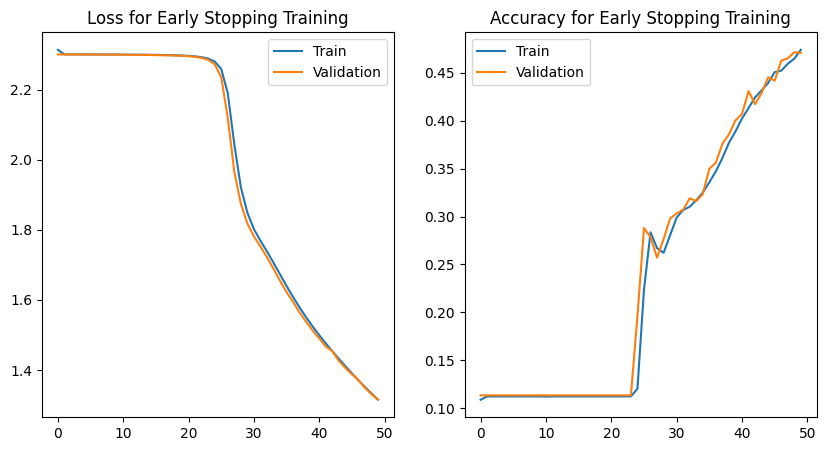

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss for Early Stopping Training")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy for Early Stopping Training")
plt.show()

**Reasoning**:
The user wants to see the final test loss and accuracy to establish a baseline for the current model. The `test_loss` and `test_accuracy` variables are already available from the previous model evaluation step.



In [ ]:
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

Final Test Loss: 1.3156
Final Test Accuracy: 0.4708


## 修改模型架構 - 激活函數

### Subtask:
將隱藏層的激活函數從 `sigmoid` 更改為 `relu`。ReLU（Rectified Linear Unit）通常在深度學習模型中表現更好，有助於解決梯度消失問題。


**Reasoning**:
The user wants to recreate the model with `relu` activation functions for the hidden layers. This requires defining a new Sequential model and adding the `Dense` layers with the updated activation.



In [ ]:
model_relu = Sequential()
model_relu.add(Dense(units=128, activation='relu', input_shape=(784,)))
model_relu.add(Dense(units=64, activation='relu'))
model_relu.add(Dense(units=32, activation='relu'))
model_relu.add(Dense(units=16, activation='relu'))
model_relu.add(Dense(units=10, activation='softmax'))
model_relu.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The next step is to add Dropout layers to the model to prevent overfitting, as specified in the task. This requires defining a new Sequential model that includes these Dropout layers.



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

%matplotlib inline
# Import useful packages
import matplotlib.pyplot as plt
import numpy as np

# Import functions for data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Import necessary modules to build our first neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#====================================================================================

from tensorflow.keras.layers import Dropout
model_dropout = Sequential()
#以下為自行添加隱藏層
model_dropout.add(Dense(units=512, activation='relu', input_shape=(784,)))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(units=512, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(units=256, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(units=256, activation='relu'))
model_dropout.add(Dropout(0.2))
#以下為Gemini建構隱藏層
model_dropout.add(Dense(units=128, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(units=128, activation='relu'))  #另外加入
model_dropout.add(Dropout(0.2))  #另外加入
model_dropout.add(Dense(units=64, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(units=32, activation='relu'))
model_dropout.add(Dropout(0.2))
#model_dropout.add(Dense(units=16, activation='relu'))
#model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(units=10, activation='softmax'))
model_dropout.summary()


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 921,770 (3.52 MB)

 Trainable params: 921,770 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The next step is to change the optimizer from `SGD` to `Adam` and then compile the `model_dropout` with the new optimizer, along with the existing loss function and metrics.



In [ ]:
model_dropout.compile(loss='categorical_crossentropy',
              optimizer='Adam', #從SGD改為Adam
              metrics=['categorical_accuracy'])

**Reasoning**:
The next step is to train the `model_dropout` with the updated architecture and Adam optimizer. I will use the `fit` method with the training and validation data, specifying a batch size, epochs, and EarlyStopping to prevent overfitting, as the overall task requires retraining the model with these changes.



In [ ]:
training_history_dropout = model_dropout.fit(X_train, y_train,
                             batch_size=256,
                             epochs=50,
                             validation_data=(X_test, y_test),
                             callbacks=[EarlyStopping(monitor='val_loss', mode='auto', patience=30)]
                             )

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - categorical_accuracy: 0.5514 - loss: 1.2816 - val_categorical_accuracy: 0.9508 - val_loss: 0.1905
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.9433 - loss: 0.2408 - val_categorical_accuracy: 0.9644 - val_loss: 0.1514
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.9621 - loss: 0.1668 - val_categorical_accuracy: 0.9744 - val_loss: 0.1075
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.9713 - loss: 0.1299 - val_categorical_accuracy: 0.9715 - val_loss: 0.1191
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.9737 - loss: 0.1124 - val_categorical_accuracy: 0.9791 - val_loss: 0.0978
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.9789 - loss: 0.0935 - val_categorical_accuracy: 0.9758 - val_loss: 0.1144
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.9778 - l

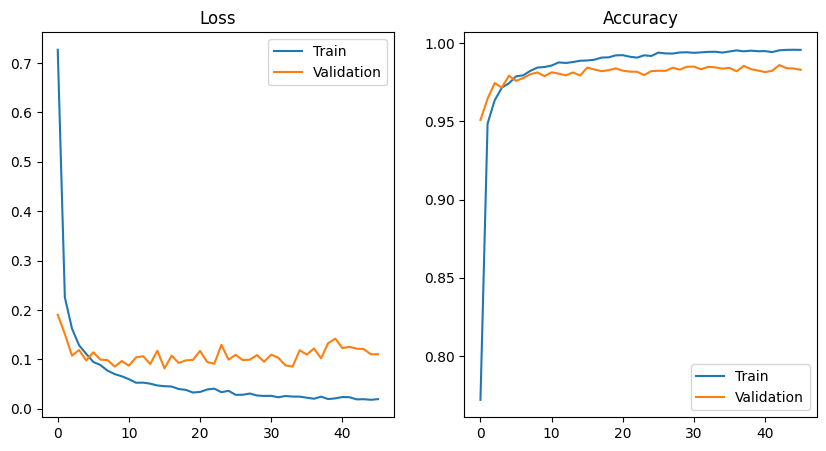

In [ ]:
#八層隱藏層，訓練50回
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history_dropout.history['loss'])
plt.plot(training_history_dropout.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history_dropout.history['categorical_accuracy'])
plt.plot(training_history_dropout.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

In [ ]:
test_loss, test_accuracy = model_dropout.evaluate(X_test, y_test)
print("測試資料 loss: %f" %test_loss)
print("測試資料準確率: %f%%" %(test_accuracy*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9794 - loss: 0.1344
測試資料 loss: 0.110378
測試資料準確率: 98.290002%
